In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rem= pd.read_csv('rem.csv')
rem.shape

(64075, 24)

#### Age
* label define agebin_lbl 2 "20 - 29", add
* label define agebin_lbl 3 "30 - 39", add
* label define agebin_lbl 4 "40 - 49", add
* label define agebin_lbl 5 "50 - 64", add
************************************************************************
#### Gender [Note: gender_d includes the "Other/prefer not to say option" while gender focuses on male/female (sex only)]
* label define gender_lbl 1 "Female"
* label define gender_lbl 2 "Male", add
* label define gender_lbl 3 "Other/prefer not to say", add
**************************************************************************
#### Income categories (coarse and fine)
label define iincomebin_lbl

0 "$10k to $20k" 

1 "$20k to $50k" 

2 "$50k to $100k" 

3 "$100k to $150k" 

4 "$150k+"
*****************************************************************************
#### Education 
##### label define education_s_lbl 
* 1 "Less than high-school degree"
* 2 "High-school degree", add
* 3 "1 to 3-years of college", add
* 4 "4-year college degree", add
* 5 "Graduate degree", add
********************************************************************************
#### Work Status 
##### label define workstatus_current_new
1 "Working for pay"

2 "Employed and paid, but not working" 

3 "Unemployed, searching" 

4 "Unemployed, awaiting recall" 

5 "Out of the labor force"

6 "Other"
**************************************************
#### Industry of current job - work_industry
1 "Agriculture",

2 "Arts & Entertainment",

3 "Finance & Insurance"

4 "Construction"

5 "Education"

6 "Health Care & Social Assistance"

7 "Hospitality & Food Services"

8 "Information"

9 "Manufacturing"

10 "Mining"

11 "Professional & Business Services"

12 "Real Estate"

13 "Retail Trade"

14 "Transportation and Warehousing"

15 "Utilities"

16 "Wholesale Trade"

17 "Government"

18 "Other"
********************************************************************************
#### Top 3 Benefits WFH / WBP
wfh_top3benefits_commute "Top 3 benefits of WFH include: No commute"

wfh_top3benefits_groom "Top 3 benefits of WFH include: Less time getting ready"

wfh_top3benefits_flex "Top 3 benefits of WFH include: Flexibility on when I work"

wfh_top3benefits_meetings "Top 3 benefits of WFH include: Fewer meetings"

wfh_top3benefits_quiet  "Top 3 benefits of WFH include: Individual quiet time"

wfh_top3benefits_family  "Top 3 benefits of WFH include: More time with family/friends"

wfh_top3benefits_other  "Top 3 benefits of WFH include: Other"
_ _ _ _
wbp_top3benefits_collab "Top 3 benefits of WBP include: Face-toface collaboration" 

wbp_top3benefits_social "Top 3 benefits of WBP include: Socializing" 

wbp_top3benefits_facetime "Top 3 benefits of WBP include: Face time with manager"

wbp_top3benefits_equip "Top 3 benefits of WBP include: Better equipment"

wbp_top3benefits_quiet "Top 3 benefits of WBP include: Quiet"

wbp_top3benefits_bound "Top 3 benefits of WBP include: Work/personal time boundaries"

wbp_top3benefits_other  "Top 3 benefits of WBP include: Other"
********************************************


In [3]:
rem = rem.drop (['wfh_days_postCOVID_boss_ss','year','month'],axis=1)
display(rem.shape)
rem.head()

(64075, 21)

agebin  education_s  iincomebin  work_industry  gender_d  \
0       3            5         3.0            1.0       1.0   
1       3            4         2.0            6.0       2.0   
2       3            5         3.0            1.0       1.0   
3       3            5         2.0           12.0       1.0   
4       5            3         2.0            8.0       1.0   

   wfh_days_postCOVID_ss  workstatus_current_new  wfh_top3benefits_commute  \
0                      2                     1.0                       1.0   
1                      3                     1.0                       0.0   
2                      5                     1.0                       0.0   
3                      3                     1.0                       0.0   
4                      5                     1.0                       1.0   

   wfh_top3benefits_groom  wfh_top3benefits_flex  wfh_top3benefits_meetings  \
0                     0.0                    0.0                        0.0   
1                     1.0                    0.0                        1.0   
2                     0.0                    0.0                        1.0   
3                     1.0                    1.0                        0.0   
4                     0.0                    1.0                        0.0   

   wfh_top3benefits_quiet  wfh_top3benefits_family  wfh_top3benefits_other  \
0                     0.0                      1.0                     0.0   
1                     0.0                      1.0                     0.0   
2                     1.0                      1.0                     0.0   
3                     0.0                      1.0                     0.0   
4                     1.0                      0.0                     0.0   

   wbp_top3benefits_collab  wbp_top3benefits_social  \
0                      0.0                      1.0   
1                      0.0                      1.0   
2                      1.0                      0.0   
3                      1.0                      0.0   
4                      1.0                      0.0   

   wbp_top3benefits_facetime  wbp_top3benefits_equip  wbp_top3benefits_quiet  \
0                        0.0                     0.0                     0.0   
1                        1.0                     0.0                     0.0   
2                        1.0                     0.0                     1.0   
3                        0.0                     1.0                     0.0   
4                        0.0                     1.0                     0.0   

   wbp_top3benefits_bound  wbp_top3benefits_other  
0                     1.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     1.0                     0.0  
4                     1.0                     0.0

In [4]:
# Define column sets
wfh_columns = [
    "wfh_top3benefits_commute",
    "wfh_top3benefits_groom",
    "wfh_top3benefits_flex",
    "wfh_top3benefits_meetings",
    "wfh_top3benefits_quiet",
    "wfh_top3benefits_family",
    "wfh_top3benefits_other"
]

wbp_columns = [
    "wbp_top3benefits_collab",
    "wbp_top3benefits_social",
    "wbp_top3benefits_facetime",
    "wbp_top3benefits_equip",
    "wbp_top3benefits_quiet",
    "wbp_top3benefits_bound",
    "wbp_top3benefits_other"
]

# Initialize dictionaries to store top 3 columns for each column set
top3_wfh = {}
top3_wbp = {}

# Calculate sum for each column set
sums_wfh = rem[wfh_columns].sum()
sums_wbp = rem[wbp_columns].sum()

# Find top 3 columns for each column set
top3_wfh = sums_wfh.nlargest(3)
top3_wbp = sums_wbp.nlargest(3)

# Print top 3 columns for each column set
print("Top 3 benefits of WFH include:")
for col, val in top3_wfh.items():
    print(f"{col}: {val}")

print("\nTop 3 benefits of WBP include:")
for col, val in top3_wbp.items():
    print(f"{col}: {val}")


Top 3 benefits of WFH include:
wfh_top3benefits_flex: 27188.0
wfh_top3benefits_commute: 24284.0
wfh_top3benefits_family: 23788.0

Top 3 benefits of WBP include:
wbp_top3benefits_social: 28825.0
wbp_top3benefits_collab: 27718.0
wbp_top3benefits_equip: 25119.0


In [5]:
# Filter the DataFrame for males (gender_d == 2)
male_data = rem[rem['gender_d'] == 2]

# Calculate the sum for each column set for males
male_sums_wfh = male_data[wfh_columns].sum()
male_sums_wbp = male_data[wbp_columns].sum()

# Find the top 3 benefits for males for WFH and WBP
top3_male_wfh = male_sums_wfh.nlargest(3)
top3_male_wbp = male_sums_wbp.nlargest(3)

# Print the top 3 benefits for males for WFH and WBP
print("Top 3 benefits for males for WFH include:")
for col, val in top3_male_wfh.items():
    print(f"{col}: {val}")

print("\nTop 3 benefits for males for WBP include:")
for col, val in top3_male_wbp.items():
    print(f"{col}: {val}")

Top 3 benefits for males for WFH include:
wfh_top3benefits_flex: 15687.0
wfh_top3benefits_family: 14199.0
wfh_top3benefits_quiet: 12827.0

Top 3 benefits for males for WBP include:
wbp_top3benefits_equip: 15116.0
wbp_top3benefits_social: 15050.0
wbp_top3benefits_collab: 15030.0


In [6]:
# Filter the DataFrame for females (gender_d == 1)
female_data = rem[rem['gender_d'] == 1]

# Calculate the sum for each column set for females
female_sums_wfh = female_data[wfh_columns].sum()
female_sums_wbp = female_data[wbp_columns].sum()

# Find the top 3 benefits for females for WFH and WBP
top3_female_wfh = female_sums_wfh.nlargest(3)
top3_female_wbp = female_sums_wbp.nlargest(3)

# Print the top 3 benefits for females for WFH and WBP
print("Top 3 benefits for females for WFH include:")
for col, val in top3_female_wfh.items():
    print(f"{col}: {val}")

print("\nTop 3 benefits for females for WBP include:")
for col, val in top3_female_wbp.items():
    print(f"{col}: {val}")

Top 3 benefits for females for WFH include:
wfh_top3benefits_commute: 13744.0
wfh_top3benefits_flex: 11397.0
wfh_top3benefits_groom: 11259.0

Top 3 benefits for females for WBP include:
wbp_top3benefits_social: 13676.0
wbp_top3benefits_collab: 12586.0
wbp_top3benefits_bound: 10582.0


In [7]:
# Count the number of responses for each gender
num_female_responses = (rem['gender_d'] == 1).sum()
num_male_responses = (rem['gender_d'] == 2).sum()

# Sum up the values chosen by males and females separately for WFH and WBP
wfh_male_sum = rem.loc[rem['gender_d'] == 2, wfh_columns].sum().sum()
wfh_female_sum = rem.loc[rem['gender_d'] == 1, wfh_columns].sum().sum()

wbp_male_sum = rem.loc[rem['gender_d'] == 2, wbp_columns].sum().sum()
wbp_female_sum = rem.loc[rem['gender_d'] == 1, wbp_columns].sum().sum()

# Normalize the sum values by the number of responses for each gender
wfh_male_normalized = wfh_male_sum / num_male_responses
wfh_female_normalized = wfh_female_sum / num_female_responses

wbp_male_normalized = wbp_male_sum / num_male_responses
wbp_female_normalized = wbp_female_sum / num_female_responses

# Print the normalized sum values for each gender and each category
print("Normalized sum values for WFH benefits:")
print(f"Male: {wfh_male_normalized}")
print(f"Female: {wfh_female_normalized}")

print("\nNormalized sum values for WBP benefits:")
print(f"Male: {wbp_male_normalized}")
print(f"Female: {wbp_female_normalized}")

# Compare the normalized totals for males
if wfh_male_normalized > wbp_male_normalized:
    print("\nOverall, males prefer WFH benefits.")
elif wfh_male_normalized < wbp_male_normalized:
    print("\nOverall, males prefer WBP benefits.")
else:
    print("\nThere is no preference difference between WFH and WBP benefits for males.")

# Compare the normalized totals for females
if wfh_female_normalized > wbp_female_normalized:
    print("\nOverall, females prefer WFH benefits.")
elif wfh_female_normalized < wbp_female_normalized:
    print("\nOverall, females prefer WBP benefits.")
else:
    print("\nThere is no preference difference between WFH and WBP benefits for females.")

Normalized sum values for WFH benefits:
Male: 2.128026893054527
Female: 2.0900407850245757

Normalized sum values for WBP benefits:
Male: 2.2060566349495754
Female: 2.1163593265242095

Overall, males prefer WBP benefits.

Overall, females prefer WBP benefits.


In [8]:
# Calculate the total count of males and females
total_males = rem['gender_d'].eq(1).sum()
total_females = rem['gender_d'].eq(2).sum()

# Sum up the values chosen by males and females separately for WFH and WBP
wfh_male_sum = rem.loc[rem['gender_d'] == 1, wfh_columns].sum().sum()
wfh_female_sum = rem.loc[rem['gender_d'] == 2, wfh_columns].sum().sum()

wbp_male_sum = rem.loc[rem['gender_d'] == 1, wbp_columns].sum().sum()
wbp_female_sum = rem.loc[rem['gender_d'] == 2, wbp_columns].sum().sum()

# Calculate the average sum values per individual for males and females
avg_wfh_male_sum = wfh_male_sum / total_males
avg_wfh_female_sum = wfh_female_sum / total_females

avg_wbp_male_sum = wbp_male_sum / total_males
avg_wbp_female_sum = wbp_female_sum / total_females

# Print the average sum values per individual for males and females
print("Average sum values per individual for WFH benefits:")
print(f"Male: {avg_wfh_male_sum}")
print(f"Female: {avg_wfh_female_sum}")

print("\nAverage sum values per individual for WBP benefits:")
print(f"Male: {avg_wbp_male_sum}")
print(f"Female: {avg_wbp_female_sum}")

# Compare the average sum values per individual for males and females
if avg_wfh_male_sum > avg_wbp_male_sum:
    print("\nOverall, males prefer WFH benefits.")
elif avg_wfh_male_sum < avg_wbp_male_sum:
    print("\nOverall, males prefer WBP benefits.")
else:
    print("\nThere is no preference difference between WFH and WBP benefits for males.")

if avg_wfh_female_sum > avg_wbp_female_sum:
    print("\nOverall, females prefer WFH benefits.")
elif avg_wfh_female_sum < avg_wbp_female_sum:
    print("\nOverall, females prefer WBP benefits.")
else:
    print("\nThere is no preference difference between WFH and WBP benefits for females.")

Average sum values per individual for WFH benefits:
Male: 2.0900407850245757
Female: 2.128026893054527

Average sum values per individual for WBP benefits:
Male: 2.1163593265242095
Female: 2.2060566349495754

Overall, males prefer WBP benefits.

Overall, females prefer WBP benefits.


In [9]:
# Calculate the least desired WFH trait
least_desired_wfh_trait = rem[wfh_columns].mean().idxmin()

# Calculate the least desired WBP trait
least_desired_wbp_trait = rem[wbp_columns].mean().idxmin()

# Calculate the highest average age bin for the least desired WFH trait
wfh_highest_age_bin = rem.groupby('agebin')[least_desired_wfh_trait].mean().idxmax()

# Calculate the highest average age bin for the least desired WBP trait
wbp_highest_age_bin = rem.groupby('agebin')[least_desired_wbp_trait].mean().idxmax()

# Calculate the average highest gender for the least desired WFH trait
avg_highest_gender_wfh = rem.groupby('gender_d')[least_desired_wfh_trait].mean().idxmax()

# Calculate the average highest gender for the least desired WBP trait
avg_highest_gender_wbp = rem.groupby('gender_d')[least_desired_wbp_trait].mean().idxmax()

# Calculate the average highest income bin for the least desired WFH trait
avg_highest_incomebin_wfh = rem.groupby('iincomebin')[least_desired_wfh_trait].mean().idxmax()

# Calculate the average highest income bin for the least desired WBP trait
avg_highest_incomebin_wbp = rem.groupby('iincomebin')[least_desired_wbp_trait].mean().idxmax()

# Calculate the average highest education status for the least desired WFH trait
avg_highest_education_wfh = rem.groupby('education_s')[least_desired_wfh_trait].mean().idxmax()

# Calculate the average highest education status for the least desired WBP trait
avg_highest_education_wbp = rem.groupby('education_s')[least_desired_wbp_trait].mean().idxmax()

# Calculate the average highest current work status for the least desired WFH trait
avg_highest_workstatus_wfh = rem.groupby('workstatus_current_new')[least_desired_wfh_trait].mean().idxmax()

# Calculate the average highest current work status for the least desired WBP trait
avg_highest_workstatus_wbp = rem.groupby('workstatus_current_new')[least_desired_wbp_trait].mean().idxmax()

# Create a DataFrame to store the results
results = pd.DataFrame({'Trait': [least_desired_wfh_trait, least_desired_wbp_trait],
                        'Average Age Bin': [wfh_highest_age_bin, wbp_highest_age_bin],
                        'Average Highest Gender WFH': [avg_highest_gender_wfh, avg_highest_gender_wbp],
                        'Average Highest Income Bin WFH': [avg_highest_incomebin_wfh, avg_highest_incomebin_wbp],
                        'Average Highest Education WFH': [avg_highest_education_wfh, avg_highest_education_wbp],
                        'Average Highest Work Status WFH': [avg_highest_workstatus_wfh, avg_highest_workstatus_wbp]})

print("Results:")
results


Results:


Trait  Average Age Bin  Average Highest Gender WFH  \
0  wfh_top3benefits_other                5                         1.0   
1  wbp_top3benefits_other                5                         3.0   

   Average Highest Income Bin WFH  Average Highest Education WFH  \
0                             0.0                              1   
1                             0.0                              3   

   Average Highest Work Status WFH  
0                              5.0  
1                              5.0

In [10]:
# Create an empty list to store the results
results_list = []

# Iterate over each age bin
for age_bin in range(2, 6):  # Assuming age bins range from 2 to 5
    # Filter the DataFrame for the current age bin
    df_age_bin = rem[rem['agebin'] == age_bin]
    
    # Calculate the least desired WFH trait for the current age bin
    least_desired_wfh_trait = df_age_bin[wfh_columns].mean().idxmin()
    
    # Calculate the least desired WBP trait for the current age bin
    least_desired_wbp_trait = df_age_bin[wbp_columns].mean().idxmin()
    
    # Append the results for the current age bin to the list
    results_list.append({'AgeBin': age_bin, 
                         'Least Desired WFH Trait': least_desired_wfh_trait, 
                         'Least Desired WBP Trait': least_desired_wbp_trait})

# Create a DataFrame from the list of results
results2 = pd.DataFrame(results_list)

results2

AgeBin Least Desired WFH Trait Least Desired WBP Trait
0       2  wfh_top3benefits_other  wbp_top3benefits_other
1       3  wfh_top3benefits_other  wbp_top3benefits_other
2       4  wfh_top3benefits_other  wbp_top3benefits_other
3       5  wfh_top3benefits_other  wbp_top3benefits_other

In [11]:
# Create an empty list to store the results
results_list = []

# Iterate over each gender (1 for Female, 2 for Male)
for gender in [1, 2]:
    # Filter the DataFrame for the current gender
    df_gender = rem[rem['gender_d'] == gender]
    
    # Iterate over each age bin
    for age_bin in range(2, 6):  # Assuming age bins range from 2 to 5
        # Filter the DataFrame for the current age bin and gender
        df_age_bin_gender = df_gender[df_gender['agebin'] == age_bin]
        
        # Calculate the least desired WFH trait for the current age bin and gender
        least_desired_wfh_trait = df_age_bin_gender[wfh_columns].mean().idxmin()
        
        # Calculate the least desired WBP trait for the current age bin and gender
        least_desired_wbp_trait = df_age_bin_gender[wbp_columns].mean().idxmin()
        
        # Append the results for the current age bin and gender to the list
        results_list.append({'Gender': gender, 
                             'AgeBin': age_bin, 
                             'Least Desired WFH Trait': least_desired_wfh_trait, 
                             'Least Desired WBP Trait': least_desired_wbp_trait})

# Create a DataFrame from the list of results
results3 = pd.DataFrame(results_list)
results3

Gender  AgeBin Least Desired WFH Trait Least Desired WBP Trait
0       1       2  wfh_top3benefits_other  wbp_top3benefits_other
1       1       3  wfh_top3benefits_other  wbp_top3benefits_other
2       1       4  wfh_top3benefits_other  wbp_top3benefits_other
3       1       5  wfh_top3benefits_other  wbp_top3benefits_other
4       2       2  wfh_top3benefits_other  wbp_top3benefits_other
5       2       3  wfh_top3benefits_other  wbp_top3benefits_other
6       2       4  wfh_top3benefits_other  wbp_top3benefits_other
7       2       5  wfh_top3benefits_other  wbp_top3benefits_other

In [12]:
# Create an empty list to store the results
results_list = []

# Iterate over each gender (1 for Female, 2 for Male)
for gender in [1, 2]:
    # Filter the DataFrame for the current gender
    df_gender = rem[rem['gender_d'] == gender]
    
    # Iterate over each income bin
    for income_bin in range(5):  # Assuming income bins range from 1 to 5
        # Filter the DataFrame for the current income bin and gender
        df_income_bin_gender = df_gender[df_gender['iincomebin'] == income_bin]
        
        # Calculate the least desired WFH trait for the current income bin and gender
        least_desired_wfh_trait = df_income_bin_gender[wfh_columns].mean().idxmin()
        
        # Calculate the least desired WBP trait for the current income bin and gender
        least_desired_wbp_trait = df_income_bin_gender[wbp_columns].mean().idxmin()
        
        # Append the results for the current income bin and gender to the list
        results_list.append({'Gender': gender, 
                             'IncomeBin': income_bin, 
                             'Least Desired WFH Trait': least_desired_wfh_trait, 
                             'Least Desired WBP Trait': least_desired_wbp_trait})

# Create a DataFrame from the list of results
results4 = pd.DataFrame(results_list)
results4

Gender  IncomeBin Least Desired WFH Trait Least Desired WBP Trait
0       1          0  wfh_top3benefits_other  wbp_top3benefits_other
1       1          1  wfh_top3benefits_other  wbp_top3benefits_other
2       1          2  wfh_top3benefits_other  wbp_top3benefits_other
3       1          3  wfh_top3benefits_other  wbp_top3benefits_other
4       1          4  wfh_top3benefits_other  wbp_top3benefits_other
5       2          0  wfh_top3benefits_other  wbp_top3benefits_other
6       2          1  wfh_top3benefits_other  wbp_top3benefits_other
7       2          2  wfh_top3benefits_other  wbp_top3benefits_other
8       2          3  wfh_top3benefits_other  wbp_top3benefits_other
9       2          4  wfh_top3benefits_other  wbp_top3benefits_other

In [13]:
# Create an empty list to store the results
results_list = []

# Iterate over each gender (1 for Female, 2 for Male)
for gender in [1, 2]:
    # Filter the DataFrame for the current gender
    df_gender = rem[rem['gender_d'] == gender]
    
    # Iterate over each income bin
    for income_bin in range(5):  # Assuming income bins range from 1 to 5
        # Filter the DataFrame for the current income bin and gender
        df_income_bin_gender = df_gender[df_gender['iincomebin'] == income_bin]
        
        # Calculate the least desired WFH trait for the current income bin and gender
        least_desired_wfh_trait = df_income_bin_gender[wfh_columns].mean().idxmin()
        
        # Calculate the most desired WFH trait for the current income bin and gender
        most_desired_wfh_trait = df_income_bin_gender[wfh_columns].mean().idxmax()
        
        # Calculate the least desired WBP trait for the current income bin and gender
        least_desired_wbp_trait = df_income_bin_gender[wbp_columns].mean().idxmin()
        
        # Calculate the most desired WBP trait for the current income bin and gender
        most_desired_wbp_trait = df_income_bin_gender[wbp_columns].mean().idxmax()
        
        # Append the results for the current income bin and gender to the list
        results_list.append({'Gender': gender, 
                             'IncomeBin': income_bin, 
                             'Least Desired WFH Trait': least_desired_wfh_trait, 
                             'Most Desired WFH Trait': most_desired_wfh_trait,
                             'Least Desired WBP Trait': least_desired_wbp_trait,
                             'Most Desired WBP Trait': most_desired_wbp_trait})

# Create a DataFrame from the list of results
results5 = pd.DataFrame(results_list)
results5

Gender  IncomeBin Least Desired WFH Trait    Most Desired WFH Trait  \
0       1          0  wfh_top3benefits_other  wfh_top3benefits_commute   
1       1          1  wfh_top3benefits_other  wfh_top3benefits_commute   
2       1          2  wfh_top3benefits_other  wfh_top3benefits_commute   
3       1          3  wfh_top3benefits_other     wfh_top3benefits_flex   
4       1          4  wfh_top3benefits_other     wfh_top3benefits_flex   
5       2          0  wfh_top3benefits_other     wfh_top3benefits_flex   
6       2          1  wfh_top3benefits_other  wfh_top3benefits_commute   
7       2          2  wfh_top3benefits_other     wfh_top3benefits_flex   
8       2          3  wfh_top3benefits_other     wfh_top3benefits_flex   
9       2          4  wfh_top3benefits_other     wfh_top3benefits_flex   

  Least Desired WBP Trait   Most Desired WBP Trait  
0  wbp_top3benefits_other  wbp_top3benefits_social  
1  wbp_top3benefits_other  wbp_top3benefits_social  
2  wbp_top3benefits_other  wbp_top3benefits_social  
3  wbp_top3benefits_other  wbp_top3benefits_social  
4  wbp_top3benefits_other  wbp_top3benefits_collab  
5  wbp_top3benefits_other  wbp_top3benefits_collab  
6  wbp_top3benefits_other  wbp_top3benefits_social  
7  wbp_top3benefits_other  wbp_top3benefits_collab  
8  wbp_top3benefits_other   wbp_top3benefits_equip  
9  wbp_top3benefits_other   wbp_top3benefits_equip

In [14]:
results5.to_excel('gender_income_wfh_wbp.xlsx', index=False)

In [15]:
# Define an empty list to store the results for each industry
results = []

# Define industry labels
industry_labels = {
    1: "Agriculture",
    2: "Arts & Entertainment",
    3: "Finance & Insurance",
    4: "Construction",
    5: "Education",
    6: "Health Care & Social Assistance",
    7: "Hospitality & Food Services",
    8: "Information",
    9: "Manufacturing",
    10: "Mining",
    11: "Professional & Business Services",
    12: "Real Estate",
    13: "Retail Trade",
    14: "Transportation and Warehousing",
    15: "Utilities",
    16: "Wholesale Trade",
    17: "Government"
}

# Iterate over each industry
for industry_code, industry_name in industry_labels.items():
    # Filter the DataFrame for the current industry
    df_industry = rem[rem['work_industry'] == industry_code]
    
    # Calculate the most desired WFH trait for the current industry
    most_desired_wfh_trait = df_industry[wfh_columns].mean().idxmax()
    
    # Calculate the most desired WBP trait for the current industry
    most_desired_wbp_trait = df_industry[wbp_columns].mean().idxmax()
    
    # Calculate the least desired WFH trait for the current industry
    least_desired_wfh_trait = df_industry[wfh_columns].mean().idxmin()
    
    # Calculate the least desired WBP trait for the current industry
    least_desired_wbp_trait = df_industry[wbp_columns].mean().idxmin()
    
    # Append the results for the current industry to the list
    results.append({'Industry': industry_name, 
                    'Most Desired WFH Trait': most_desired_wfh_trait, 
                    'Most Desired WBP Trait': most_desired_wbp_trait, 
                    'Least Desired WFH Trait': least_desired_wfh_trait, 
                    'Least Desired WBP Trait': least_desired_wbp_trait})

# Create a DataFrame from the list of results
industry_wfh_wbp = pd.DataFrame(results)
industry_wfh_wbp

Industry    Most Desired WFH Trait  \
0                        Agriculture     wfh_top3benefits_flex   
1               Arts & Entertainment     wfh_top3benefits_flex   
2                Finance & Insurance     wfh_top3benefits_flex   
3                       Construction     wfh_top3benefits_flex   
4                          Education  wfh_top3benefits_commute   
5    Health Care & Social Assistance  wfh_top3benefits_commute   
6        Hospitality & Food Services     wfh_top3benefits_flex   
7                        Information     wfh_top3benefits_flex   
8                      Manufacturing     wfh_top3benefits_flex   
9                             Mining    wfh_top3benefits_groom   
10  Professional & Business Services     wfh_top3benefits_flex   
11                       Real Estate     wfh_top3benefits_flex   
12                      Retail Trade  wfh_top3benefits_commute   
13    Transportation and Warehousing  wfh_top3benefits_commute   
14                         Utilities  wfh_top3benefits_commute   
15                   Wholesale Trade  wfh_top3benefits_commute   
16                        Government  wfh_top3benefits_commute   

       Most Desired WBP Trait Least Desired WFH Trait Least Desired WBP Trait  
0     wbp_top3benefits_collab  wfh_top3benefits_other  wbp_top3benefits_other  
1     wbp_top3benefits_collab  wfh_top3benefits_other  wbp_top3benefits_other  
2     wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
3      wbp_top3benefits_equip  wfh_top3benefits_other  wbp_top3benefits_other  
4     wbp_top3benefits_collab  wfh_top3benefits_other  wbp_top3benefits_other  
5     wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
6     wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
7     wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
8     wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
9   wbp_top3benefits_facetime  wfh_top3benefits_other  wbp_top3benefits_other  
10    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
11    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
12    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
13    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
14    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
15    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other  
16    wbp_top3benefits_social  wfh_top3benefits_other  wbp_top3benefits_other

In [16]:
# industry_wfh_wbp.to_excel('industry_wfh_wbp.xlsx', index=False)

In [17]:
## Corrolation between 'agebin' and the prediction column 'wfh_days_postCOVID_ss'

In [18]:
## convert wfh_days_postCOVID_ss to two posibilities - 0 ="Rarely or never"+"1 day per week" & 1 = all other numbers. 
## This will create two possible employees - those who want to wfh and those who don't 
mapping = {
    1: 0,
    2: 0,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    7: 0,
    8: 0
}

# Replace the values according to the mapping
rem['wfh_days_postCOVID_ss'] = rem['wfh_days_postCOVID_ss'].replace(mapping)
rem.head(5)

agebin  education_s  iincomebin  work_industry  gender_d  \
0       3            5         3.0            1.0       1.0   
1       3            4         2.0            6.0       2.0   
2       3            5         3.0            1.0       1.0   
3       3            5         2.0           12.0       1.0   
4       5            3         2.0            8.0       1.0   

   wfh_days_postCOVID_ss  workstatus_current_new  wfh_top3benefits_commute  \
0                      0                     1.0                       1.0   
1                      1                     1.0                       0.0   
2                      1                     1.0                       0.0   
3                      1                     1.0                       0.0   
4                      1                     1.0                       1.0   

   wfh_top3benefits_groom  wfh_top3benefits_flex  wfh_top3benefits_meetings  \
0                     0.0                    0.0                        0.0   
1                     1.0                    0.0                        1.0   
2                     0.0                    0.0                        1.0   
3                     1.0                    1.0                        0.0   
4                     0.0                    1.0                        0.0   

   wfh_top3benefits_quiet  wfh_top3benefits_family  wfh_top3benefits_other  \
0                     0.0                      1.0                     0.0   
1                     0.0                      1.0                     0.0   
2                     1.0                      1.0                     0.0   
3                     0.0                      1.0                     0.0   
4                     1.0                      0.0                     0.0   

   wbp_top3benefits_collab  wbp_top3benefits_social  \
0                      0.0                      1.0   
1                      0.0                      1.0   
2                      1.0                      0.0   
3                      1.0                      0.0   
4                      1.0                      0.0   

   wbp_top3benefits_facetime  wbp_top3benefits_equip  wbp_top3benefits_quiet  \
0                        0.0                     0.0                     0.0   
1                        1.0                     0.0                     0.0   
2                        1.0                     0.0                     1.0   
3                        0.0                     1.0                     0.0   
4                        0.0                     1.0                     0.0   

   wbp_top3benefits_bound  wbp_top3benefits_other  
0                     1.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     1.0                     0.0  
4                     1.0                     0.0

In [19]:
rem.wfh_days_postCOVID_ss.value_counts(dropna=False)

wfh_days_postCOVID_ss
1    48691
0    15384
Name: count, dtype: int64

In [20]:

# Grouping by 'agebin' and summing the 'wfh_days_postCOVID_ss' where the value is 1
sum_1 = rem[rem['wfh_days_postCOVID_ss'] == 1].groupby('agebin')['wfh_days_postCOVID_ss'].count().reset_index()
sum_1.rename(columns={'wfh_days_postCOVID_ss': 'sum_1_wfh_days_postCOVID_ss'}, inplace=True)

# Grouping by 'agebin' and summing the 'wfh_days_postCOVID_ss' where the value is 0
sum_0 = rem[rem['wfh_days_postCOVID_ss'] == 0].groupby('agebin')['wfh_days_postCOVID_ss'].count().reset_index()
sum_0.rename(columns={'wfh_days_postCOVID_ss': 'sum_0_wfh_days_postCOVID_ss'}, inplace=True)

# Merging sum_1 and sum_0 dataframes on 'agebin'
age_wfhdays = pd.merge(sum_1, sum_0, on='agebin', how='outer')

print(age_wfhdays)

   agebin  sum_1_wfh_days_postCOVID_ss  sum_0_wfh_days_postCOVID_ss
0       2                         7514                         3160
1       3                        22598                         6162
2       4                        12961                         3565
3       5                         5618                         2497


In [21]:
counts = rem.groupby('agebin')['wfh_days_postCOVID_ss'].value_counts().unstack(fill_value=0)

# Calculating percentage of responses per agebin
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Renaming the columns
percentages.rename(columns={0: 'percent_0', 1: 'percent_1'}, inplace=True)

print(percentages)

wfh_days_postCOVID_ss  percent_0  percent_1
agebin                                     
2                      29.604647  70.395353
3                      21.425591  78.574409
4                      21.572068  78.427932
5                      30.770179  69.229821


In [22]:
## Plotting corrolation

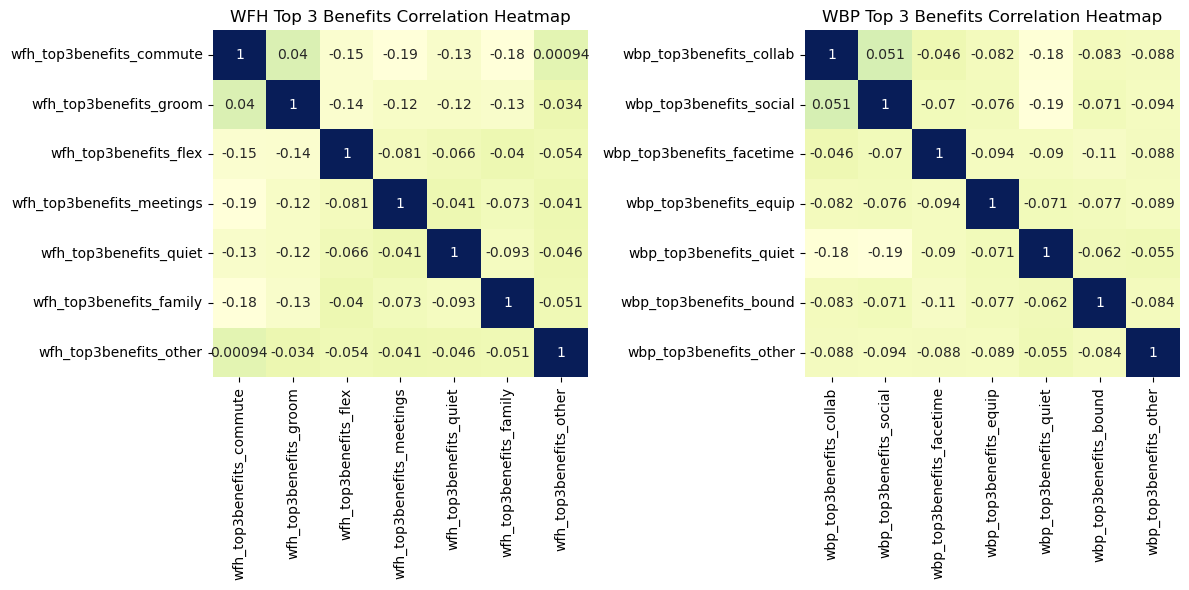

In [23]:
# Subset the DataFrame with these column sets
wfh_data = rem[wfh_columns]
wbp_data = rem[wbp_columns]

# Create subplots for each heatmap
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create heatmaps for WFH and WBP
sns.heatmap(wfh_data.corr(), annot=True, cmap="YlGnBu", ax=axs[0], cbar=False)
sns.heatmap(wbp_data.corr(), annot=True, cmap="YlGnBu", ax=axs[1], cbar=False)

# Set titles for subplots
axs[0].set_title('WFH Top 3 Benefits Correlation Heatmap')
axs[1].set_title('WBP Top 3 Benefits Correlation Heatmap')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

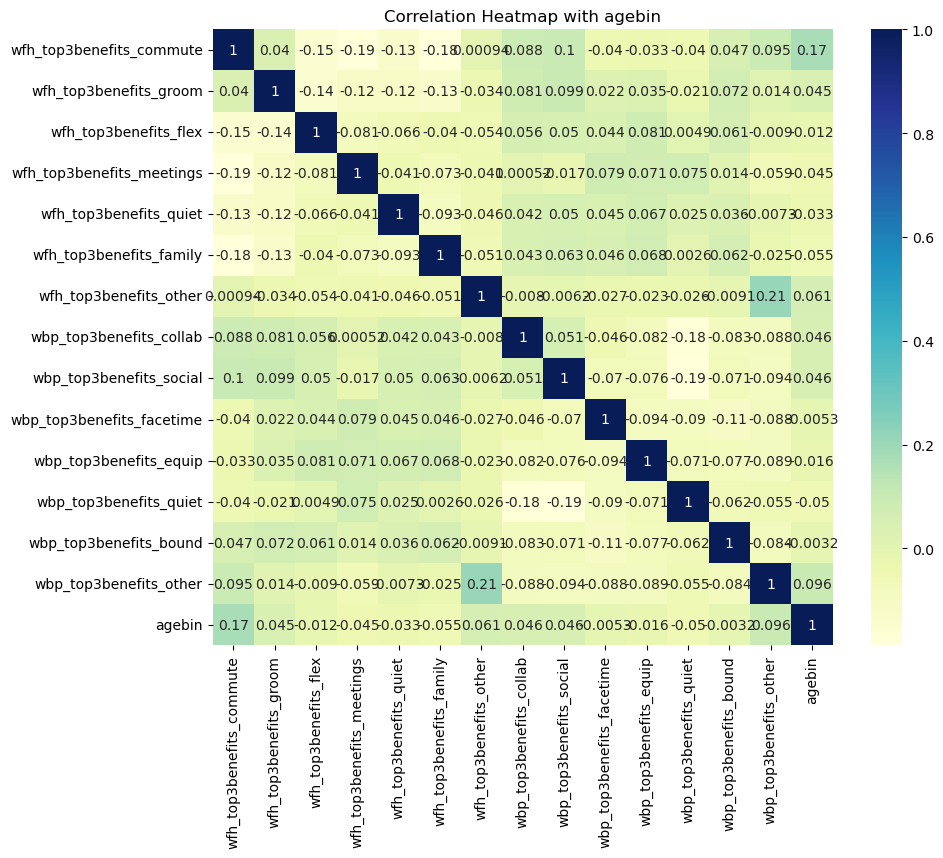

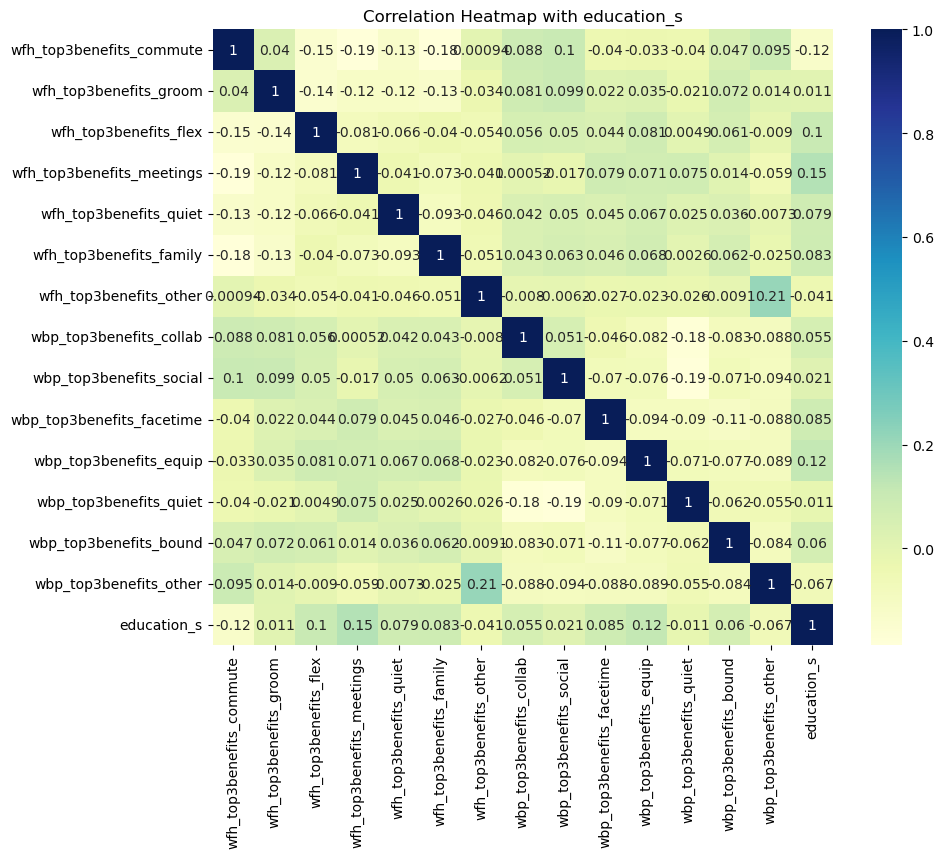

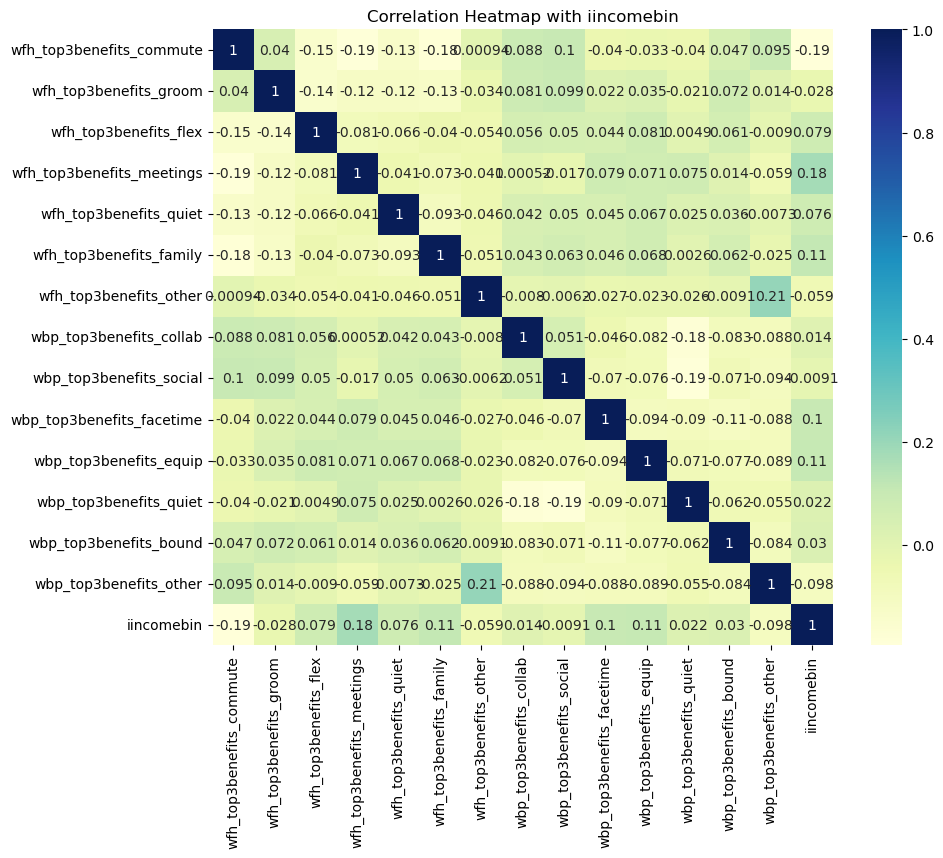

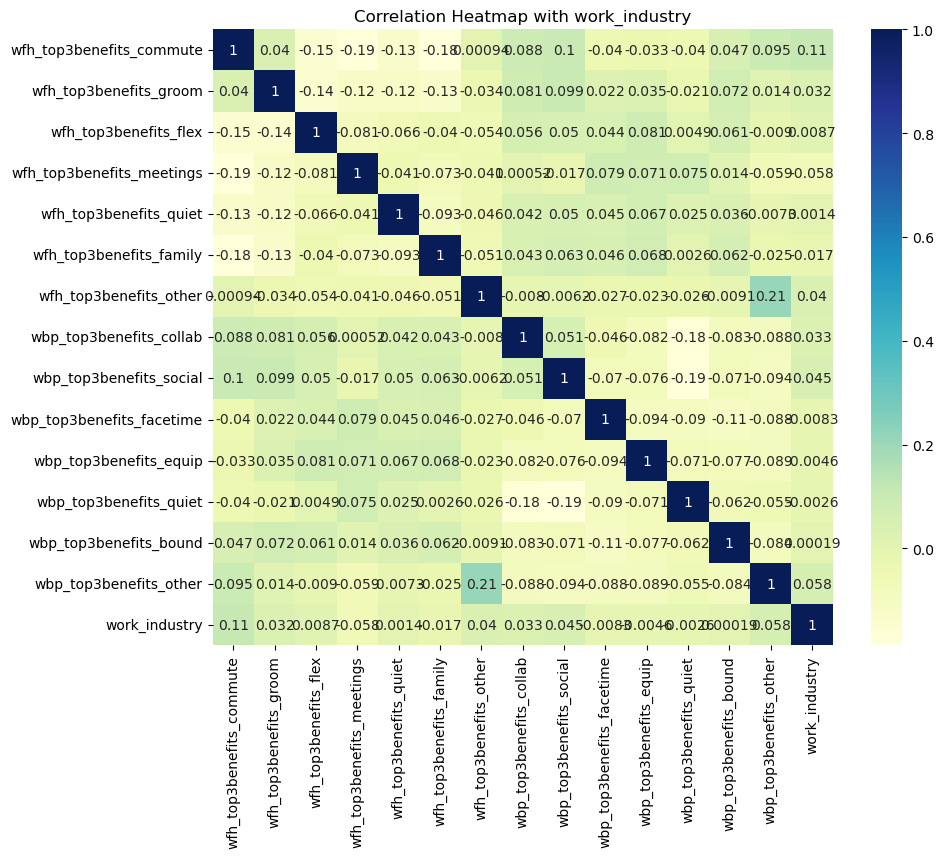

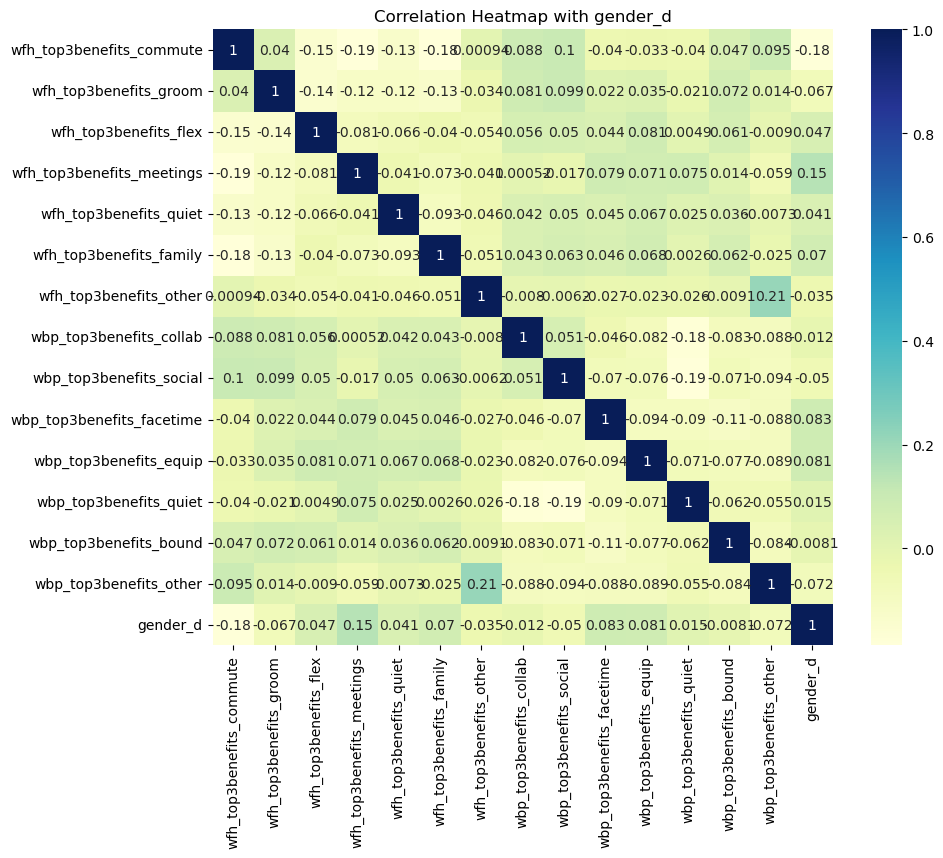

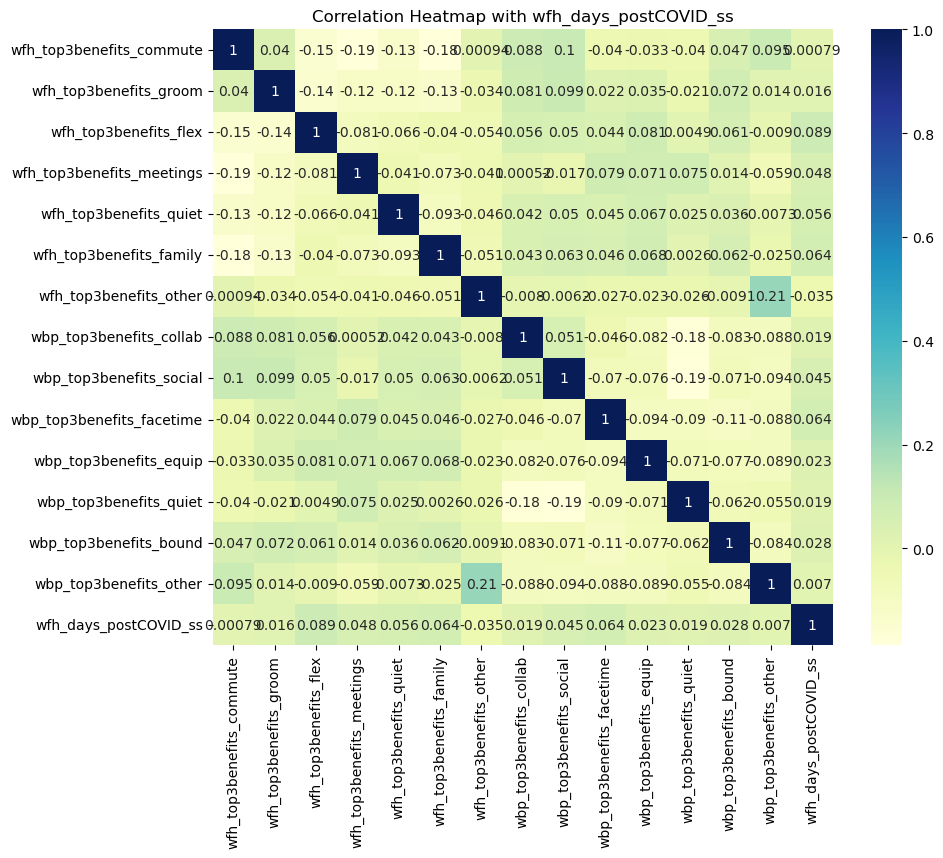

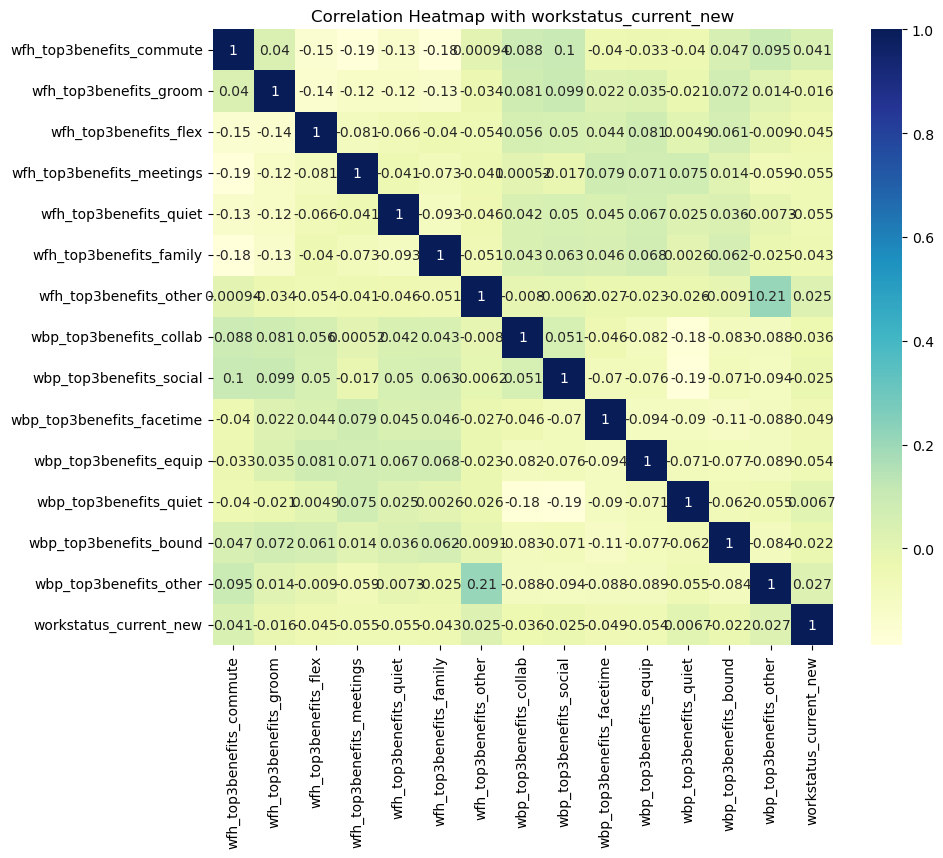

In [24]:
for col in rem.columns:
    if col not in wfh_columns and col not in wbp_columns:
        # Select the column for correlation
        column_to_correlate = rem[col]
        
        # Combine wfh_data, wbp_data, and the selected column
        combined_data = pd.concat([wfh_data, wbp_data, column_to_correlate], axis=1)
        
        # Calculate the correlation matrix
        correlation_matrix = combined_data.corr()
        
        # Create the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
        
        # Set title
        plt.title(f'Correlation Heatmap with {col}')
        
        # Show plot
        plt.show()

In [25]:
agebin_labels = {
    2: "20 - 29",
    3: "30 - 39",
    4: "40 - 49",
    5: "50 - 64"
}
agebin_labels

{2: '20 - 29', 3: '30 - 39', 4: '40 - 49', 5: '50 - 64'}

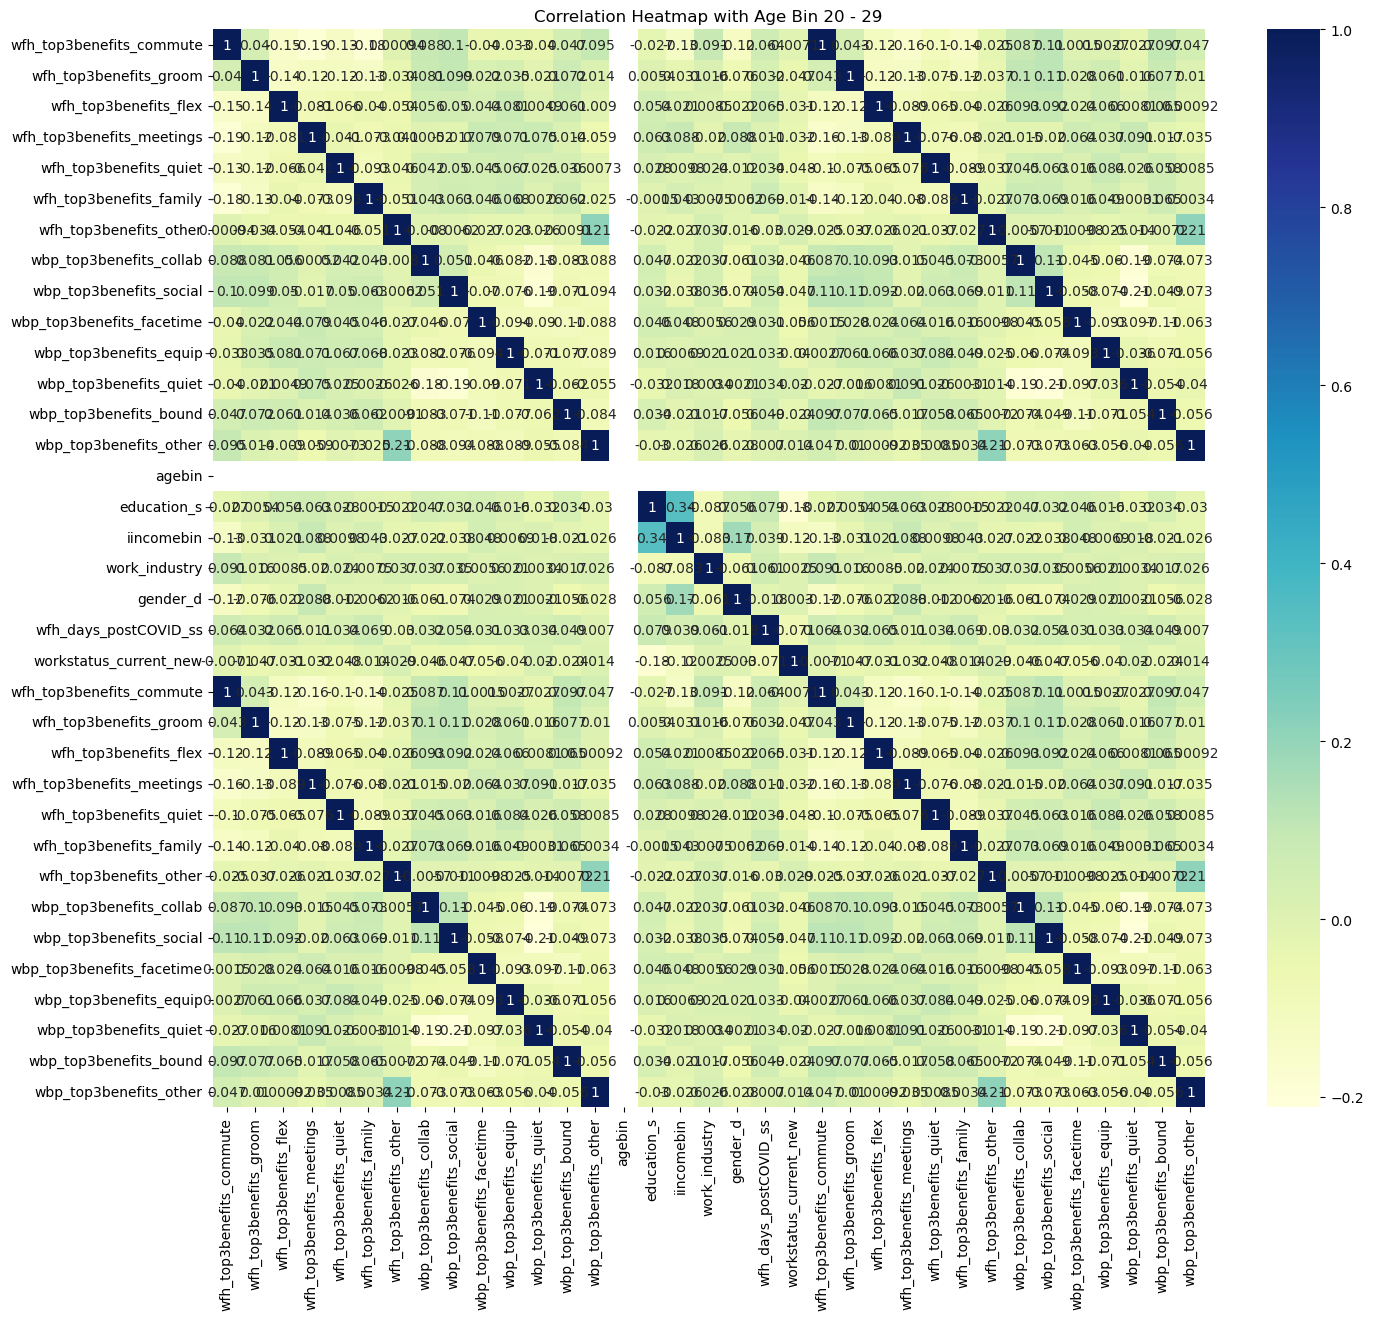

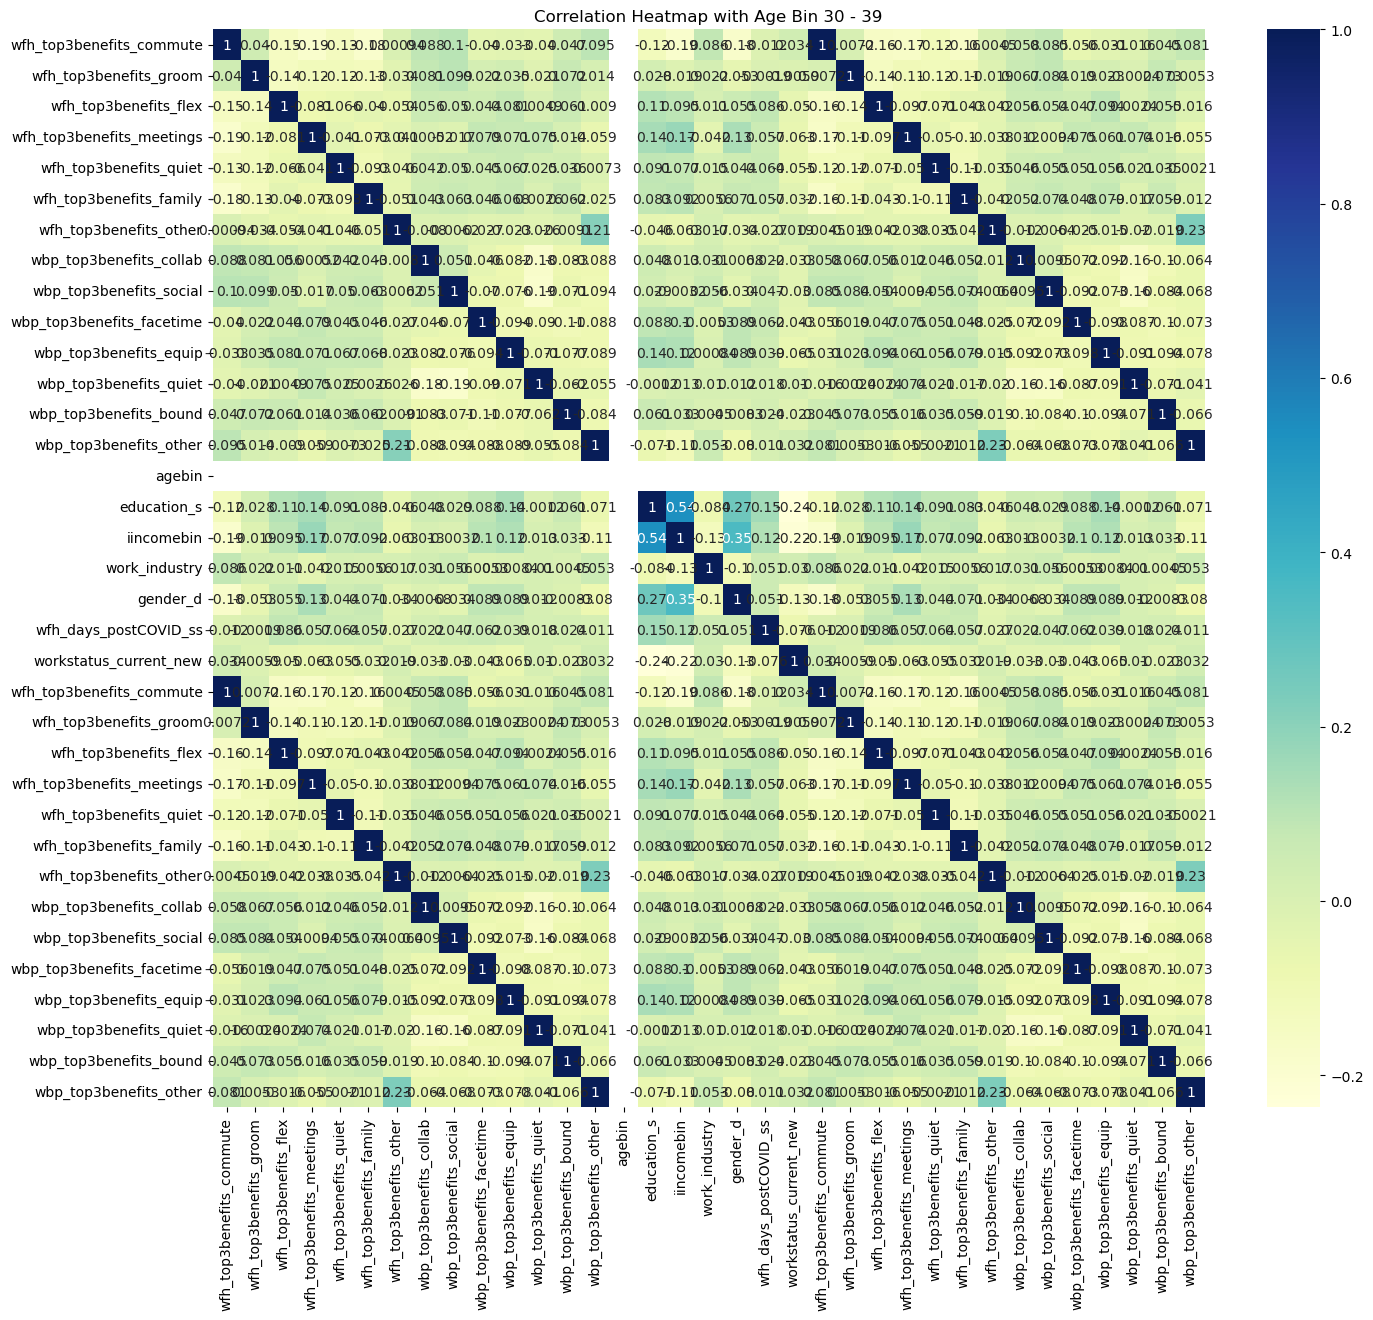

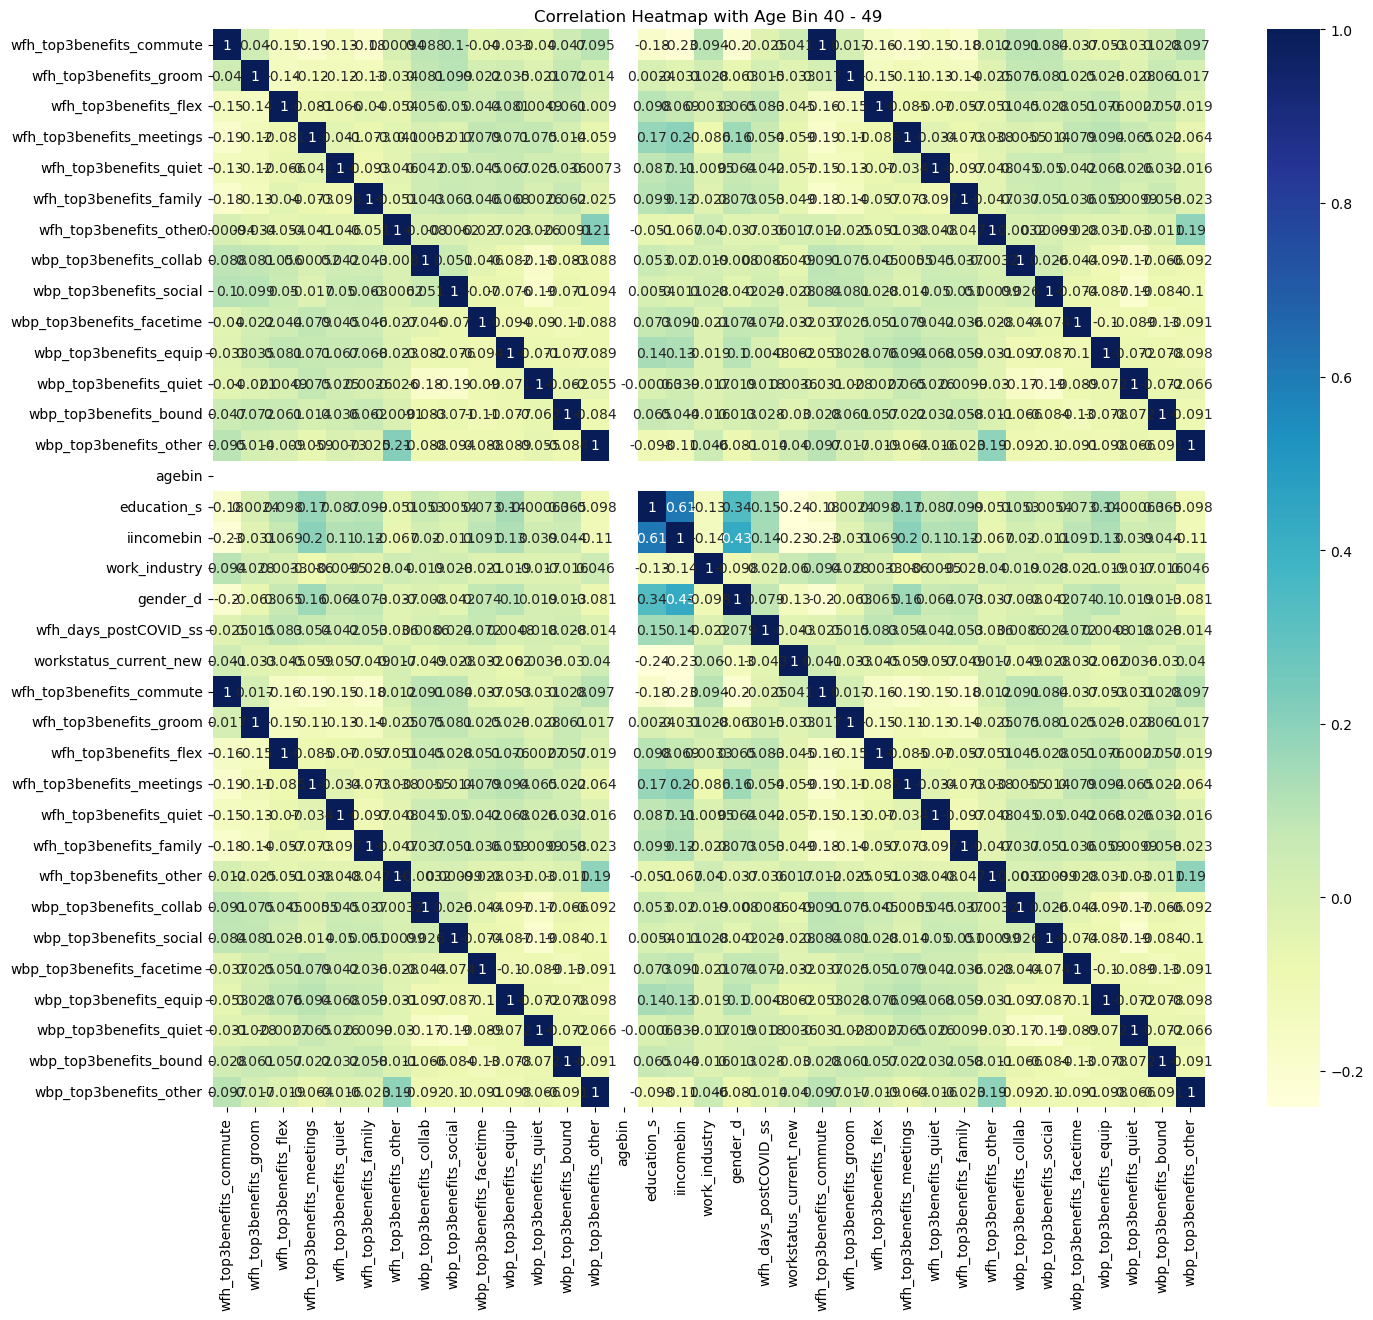

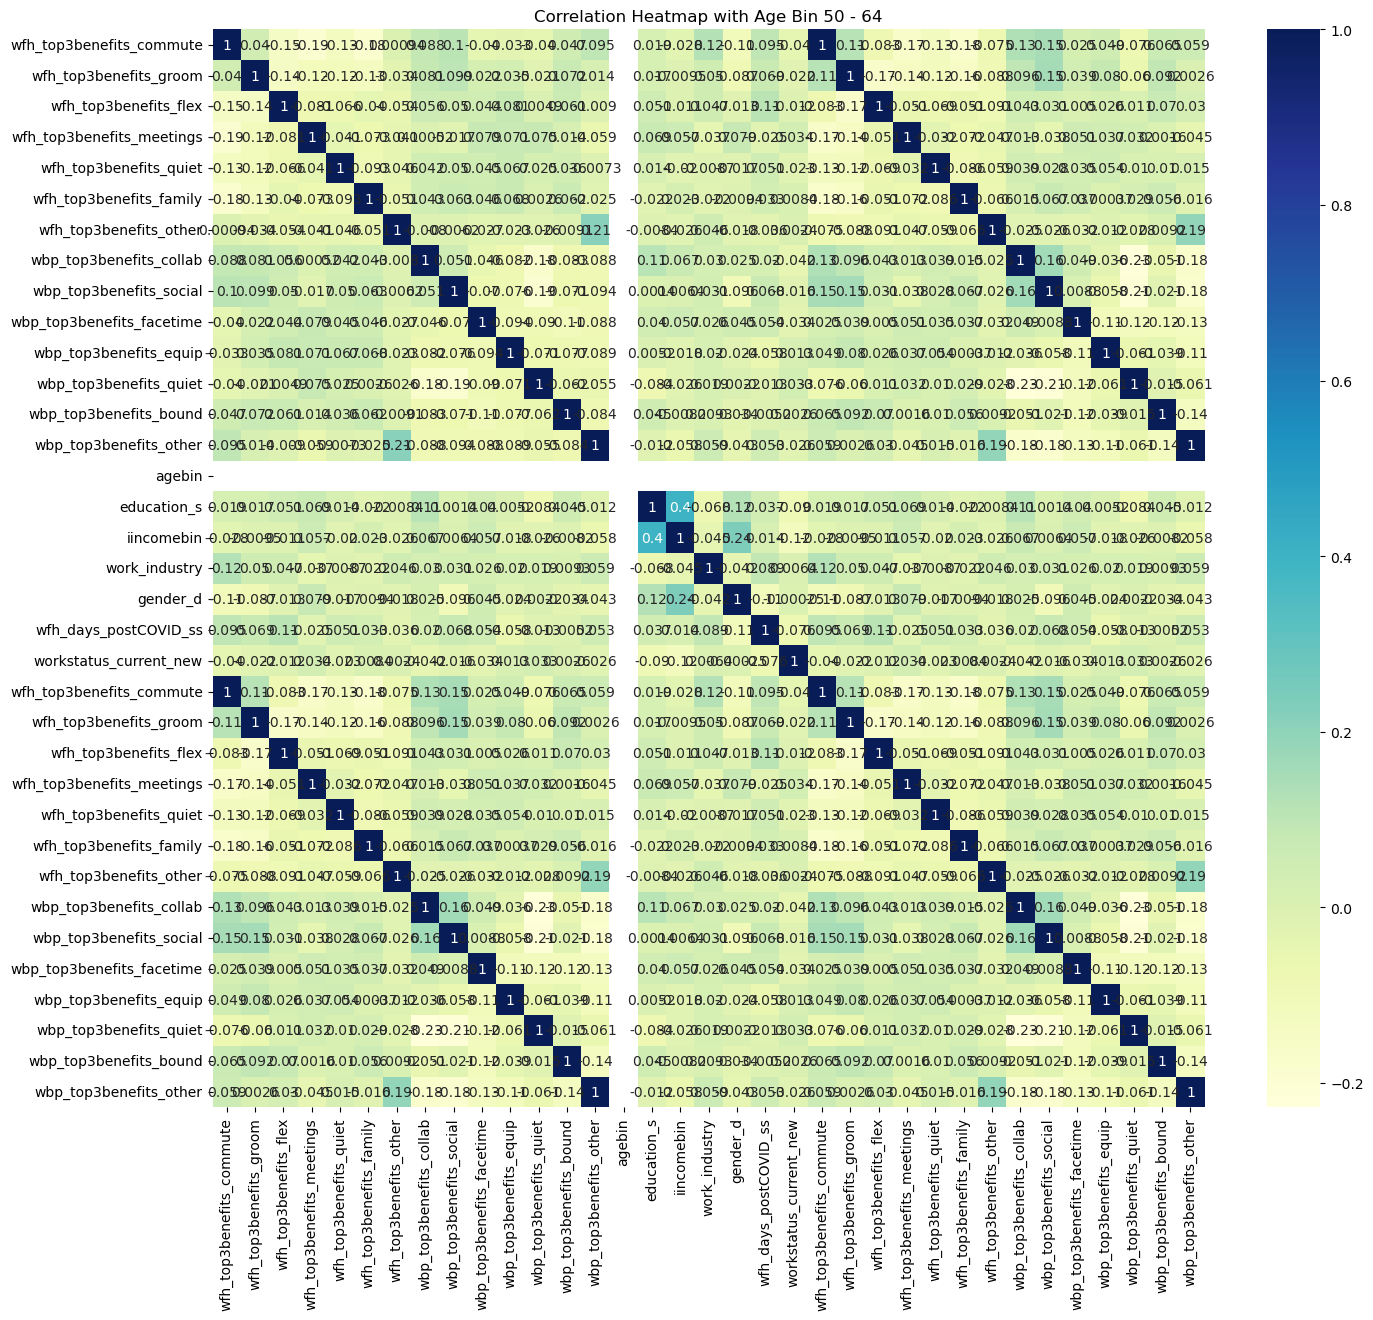

In [26]:
for age_bin, label in agebin_labels.items():
    # Filter the DataFrame for the current age bin
    age_bin_data = rem[rem['agebin'] == age_bin]
    
    # Combine wfh_data and wbp_data with the current age bin data
    combined_data = pd.concat([wfh_data, wbp_data, age_bin_data], axis=1)
    
    # Calculate the correlation matrix
    correlation_matrix = combined_data.corr()
    
    # Create the heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
    
    # Set title
    plt.title(f'Correlation Heatmap with Age Bin {label}')
    
    # Show plot
    plt.show()

In [27]:
gender_labels = {
    1: "Female",
    2: "Male",
    3: "Other/prefer not to say"
}

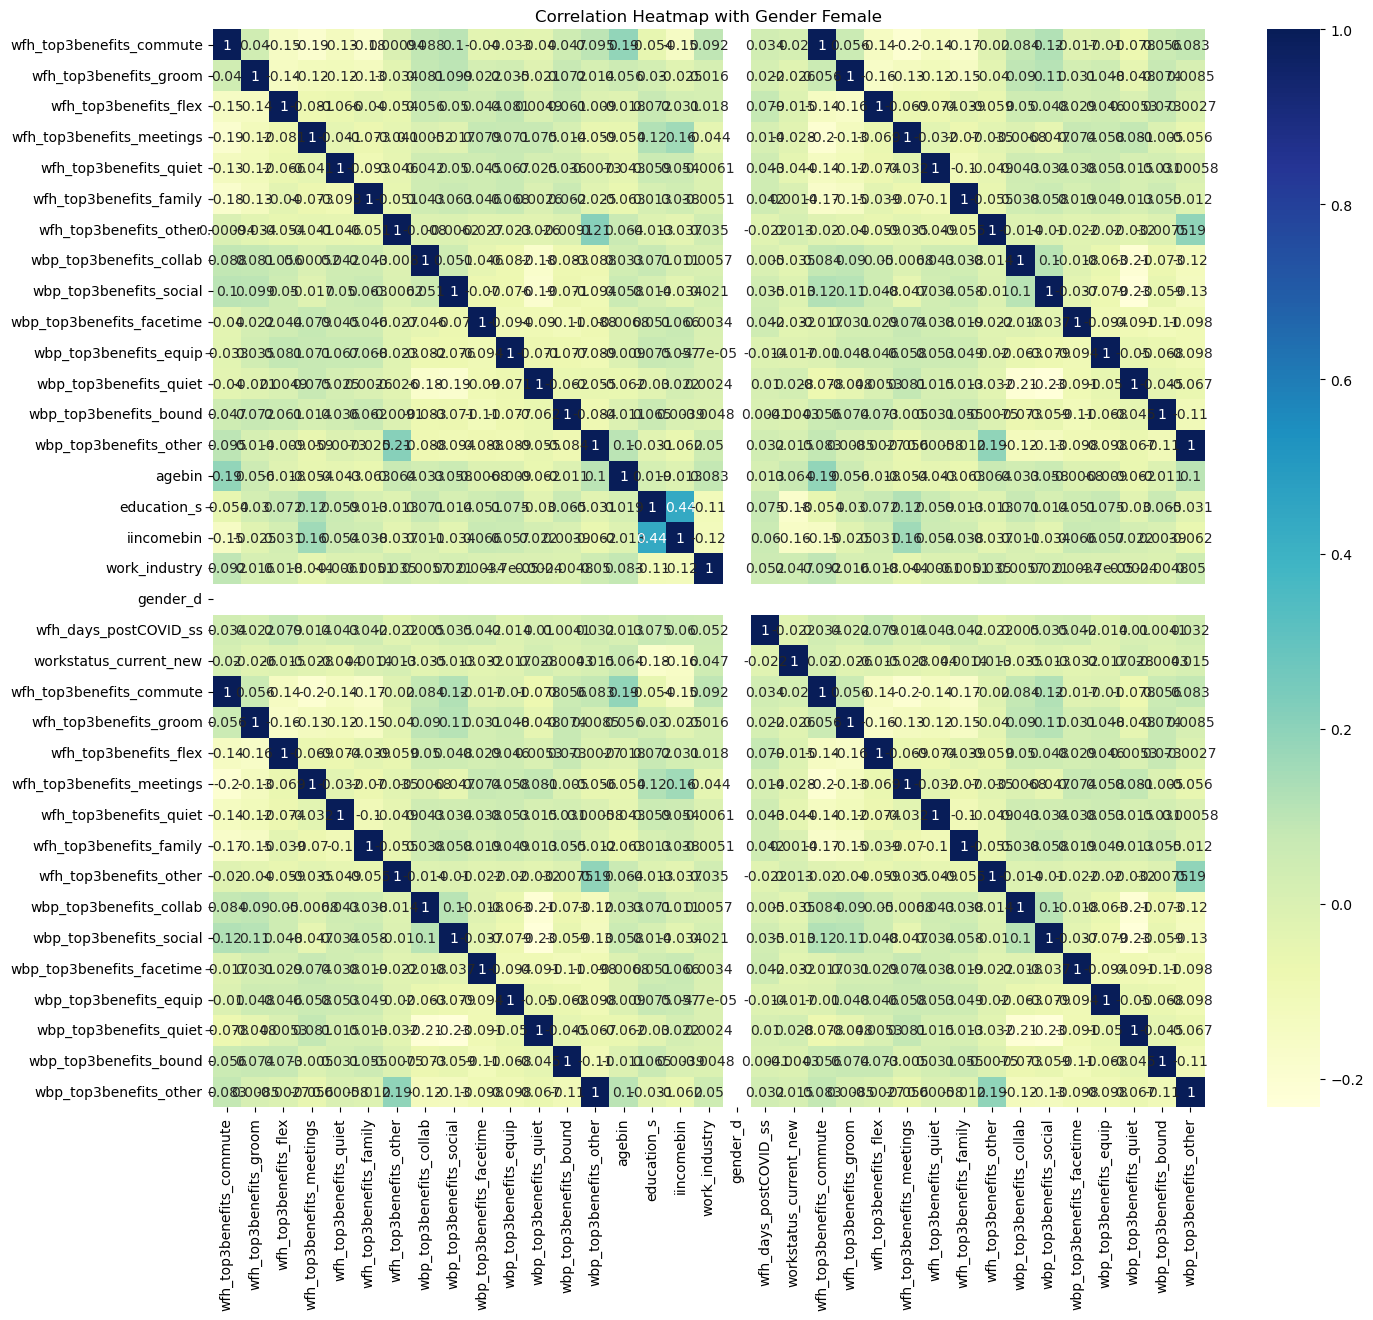

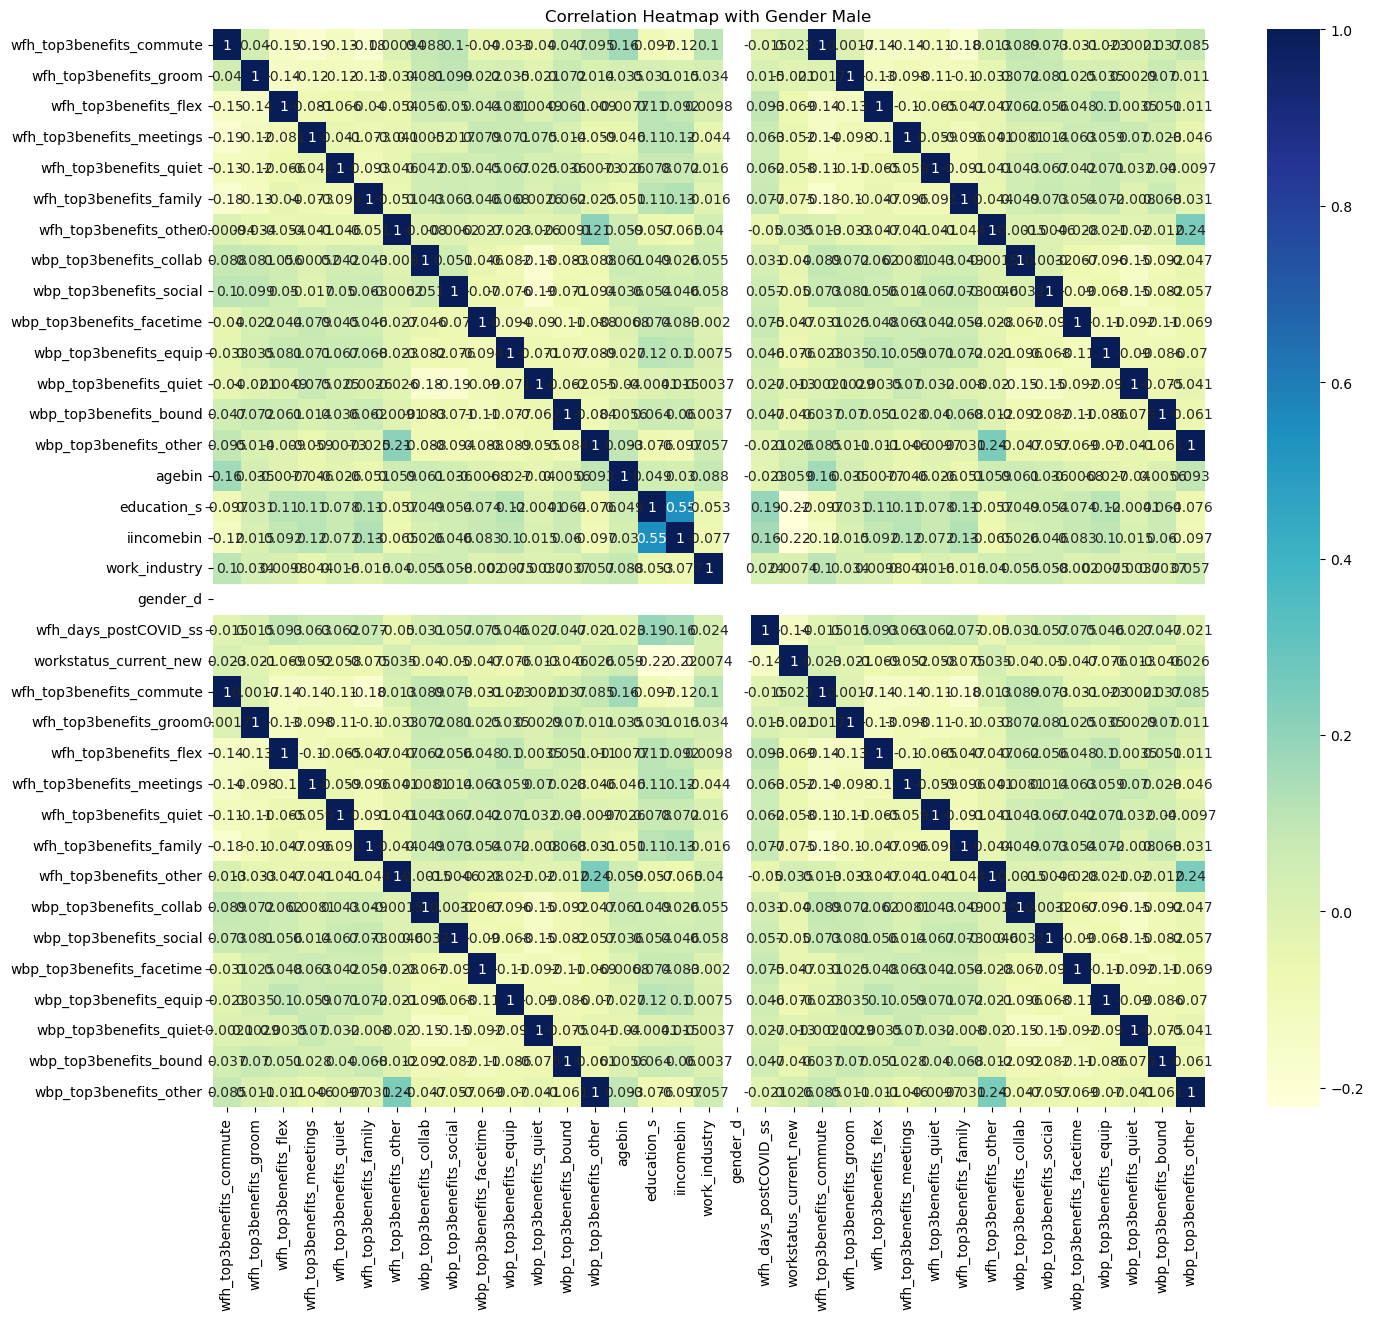

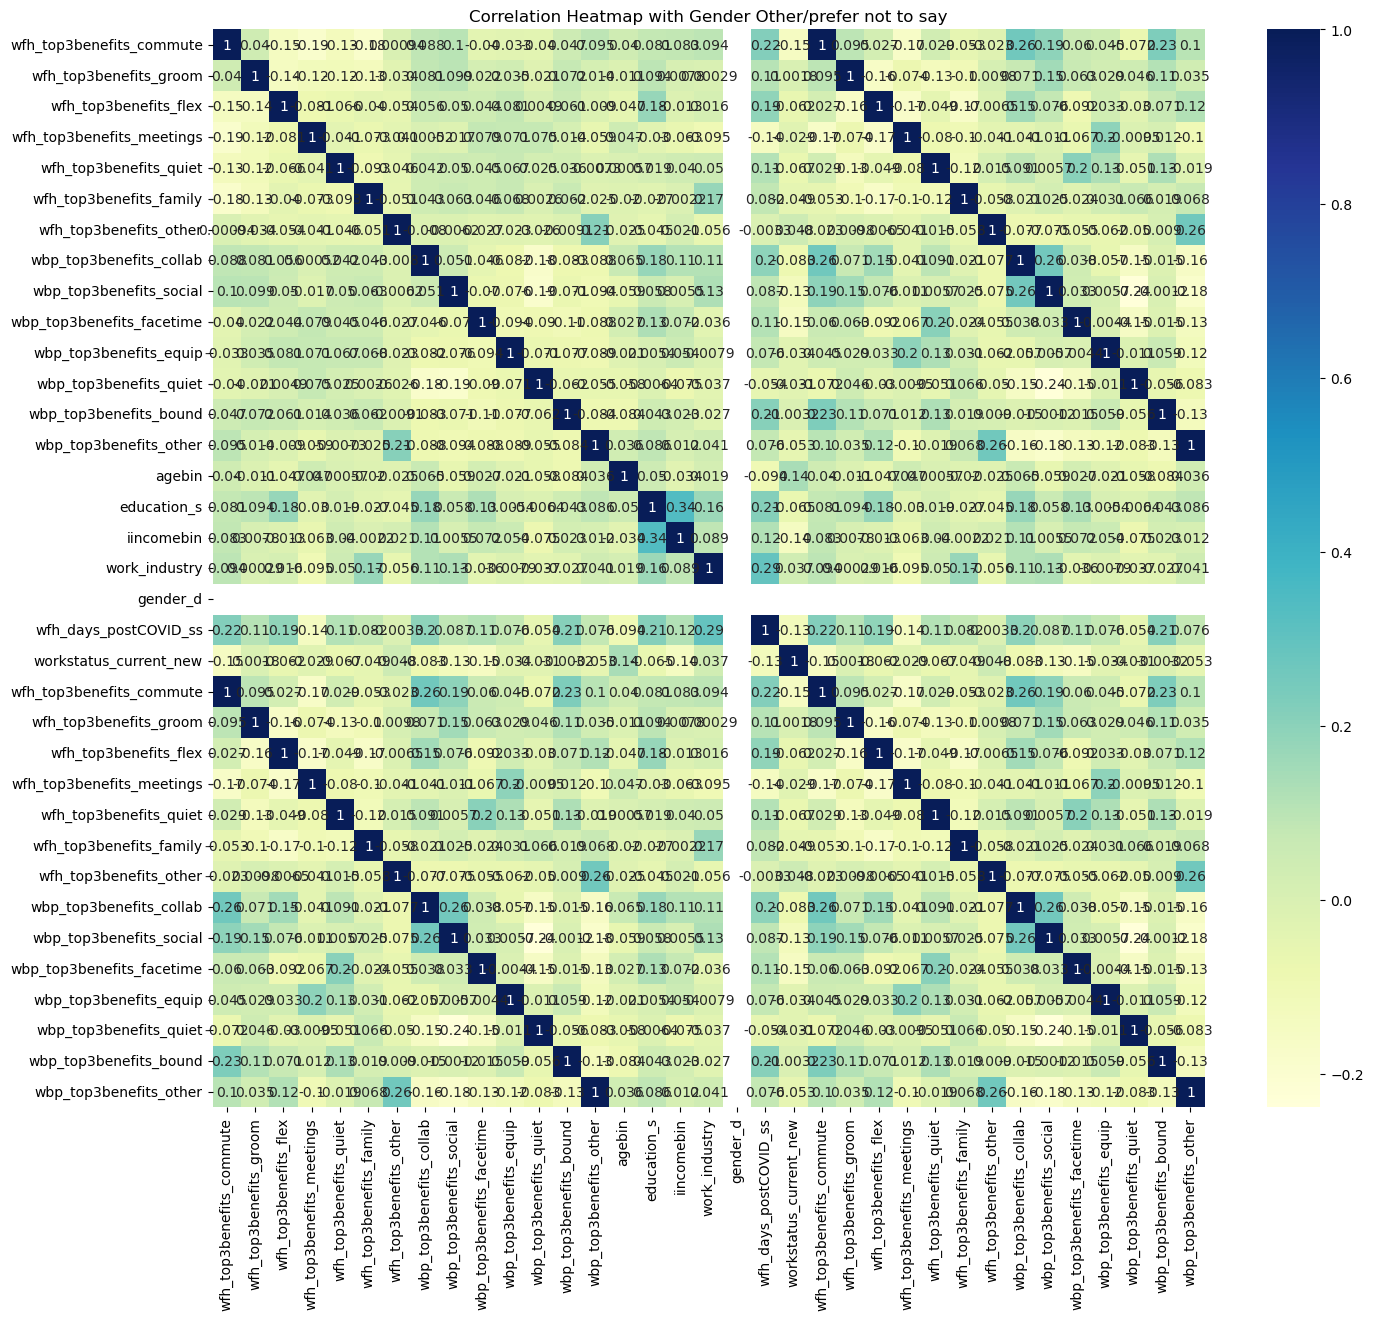

In [28]:
for gender_code, label in gender_labels.items():
    # Filter the DataFrame for the current gender category
    gender_data = rem[rem['gender_d'] == gender_code]
    
    # Combine wfh_data and wbp_data with the current gender data
    combined_data = pd.concat([wfh_data, wbp_data, gender_data], axis=1)
    
    # Calculate the correlation matrix
    correlation_matrix = combined_data.corr()
    
    # Create the heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
    
    # Set title
    plt.title(f'Correlation Heatmap with Gender {label}')
    
    # Show plot
    plt.show()